### Exploratory Data Analysis - Seaborn
Oct 15, 2019

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import pandas_profiling

%matplotlib inline

In [6]:
titanic = pd.read_csv(r'kaggle titanic/train.csv')

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

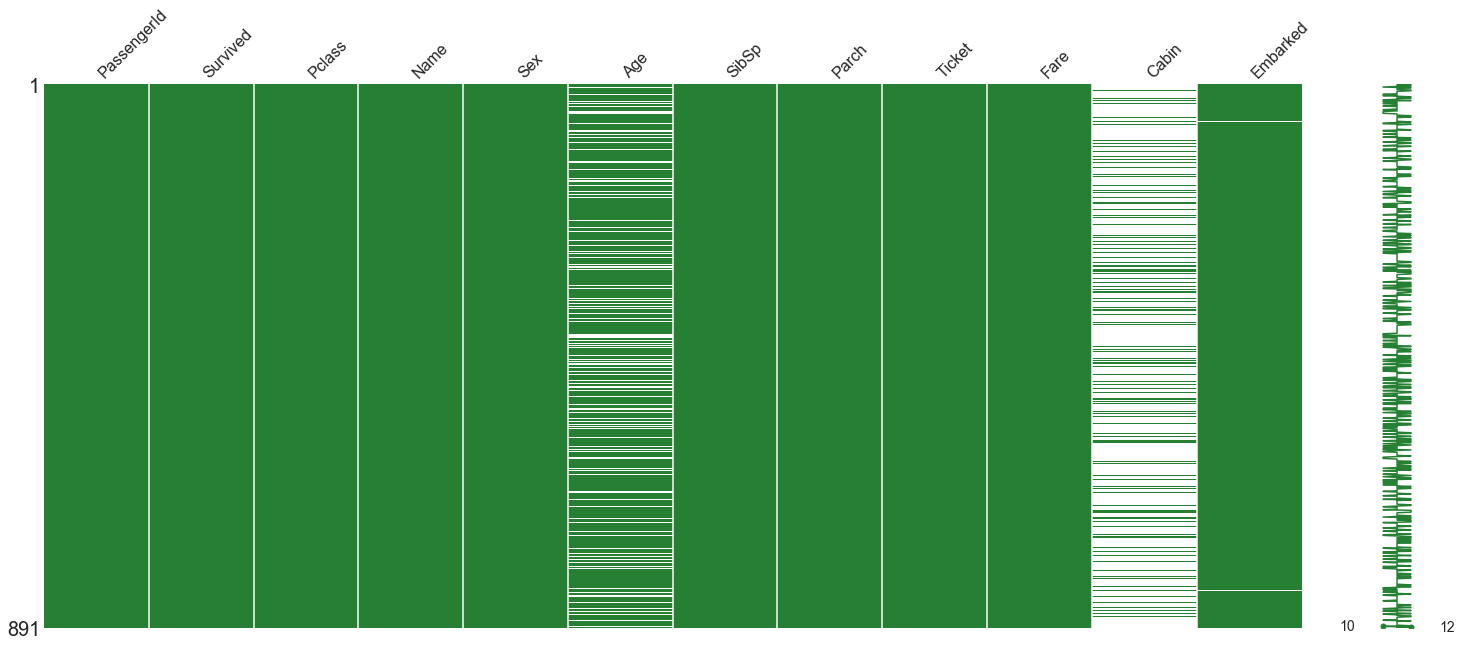

In [53]:
missingno.matrix(titanic, color=(0.15, 0.5, 0.2))

In [58]:
pandas_profiling.ProfileReport(titanic)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


#### SEX (Male/Female)

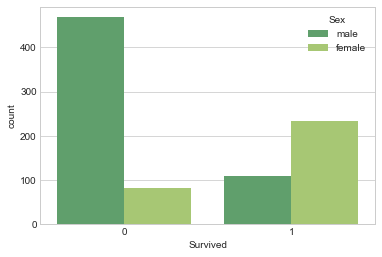

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic, hue='Sex', palette='summer')

Text(0,0.5,'Survived')

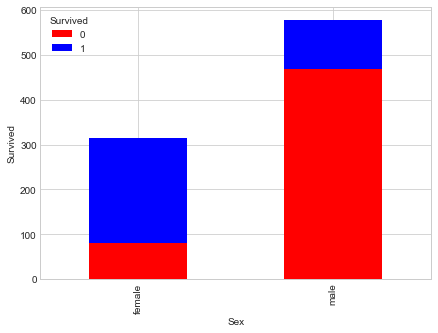

In [37]:
temp = pd.crosstab(titanic.Sex, titanic.Survived)
temp.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(7,5)).set_ylabel('Survived')
#plt.set_ylabel('Survived')

#### PClass (Passenger Class)

In [13]:
titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

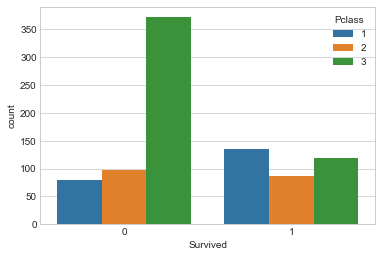

In [20]:
sns.countplot(x='Survived', data=titanic, hue='Pclass')

Text(0,0.5,'Survived')

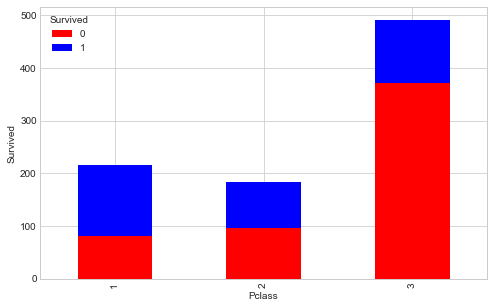

In [39]:
temp2 = pd.crosstab(titanic.Pclass,titanic.Survived)
temp2.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(8,5)).set_ylabel('Survived')

#### Age - Passenger Age

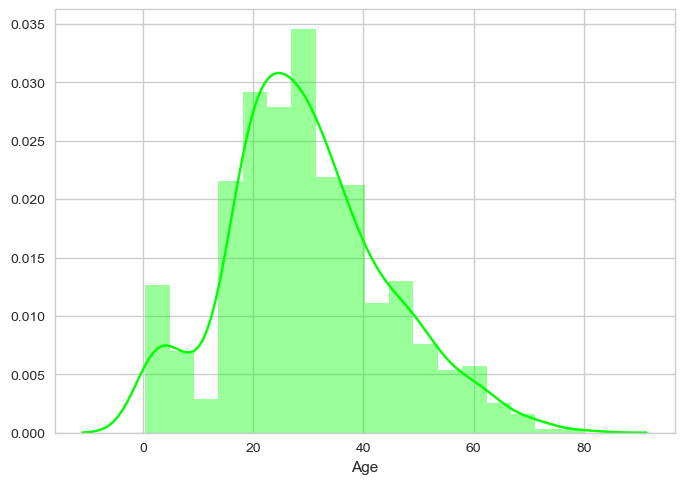

In [70]:
sns.set_style('whitegrid')
sns.distplot(titanic.Age.dropna(), bins=18, color='lime')

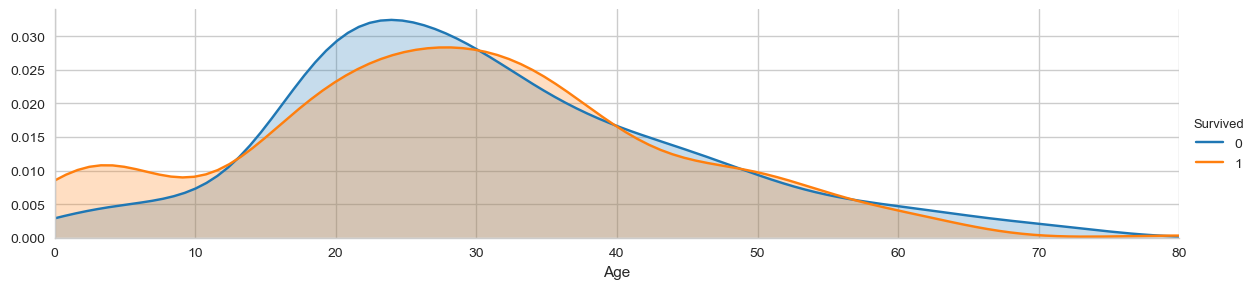

In [82]:
facet = sns.FacetGrid(data=titanic, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()

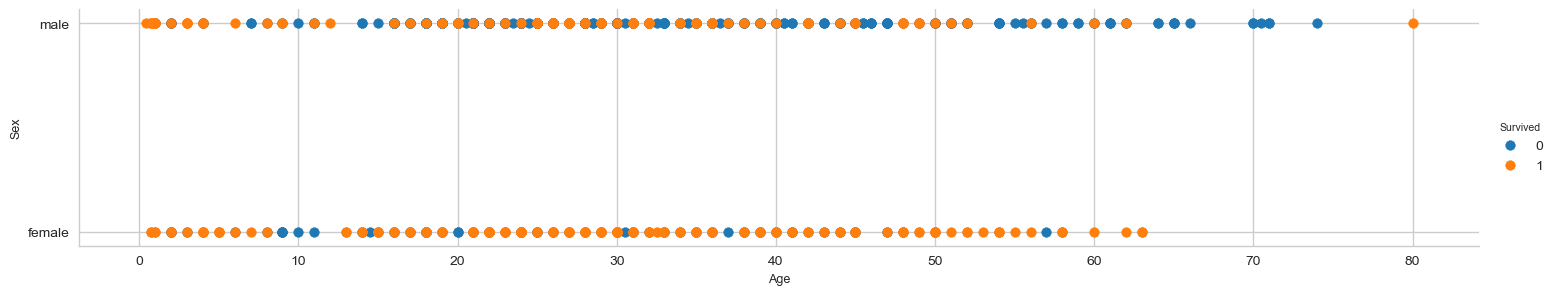

In [112]:
#facet = sns.FacetGrid(data=titanic, hue='Survived', aspect=4)
sns.set_context(font_scale=2, rc={'font.size':8, 'axes.labelsize':9})
sns.set_style('whitegrid')
sns.FacetGrid(titanic, hue='Survived', aspect=5)\
.map(plt.scatter, 'Age', 'Sex')\
.add_legend()

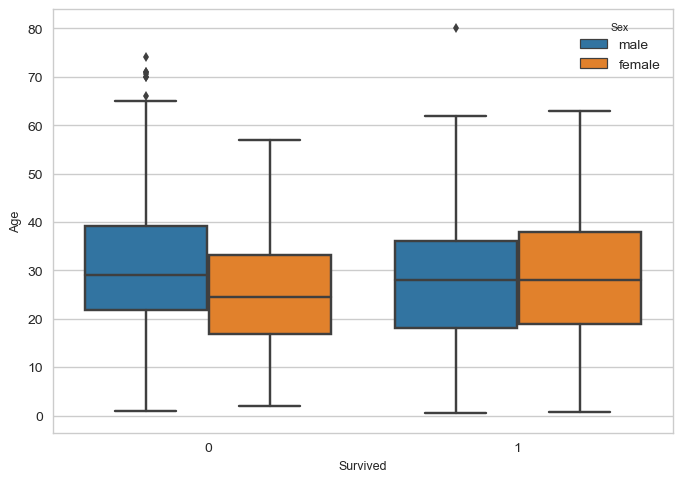

In [113]:
sns.boxplot(x='Survived',y='Age', data=titanic, hue='Sex')

#### Embarked
Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [92]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

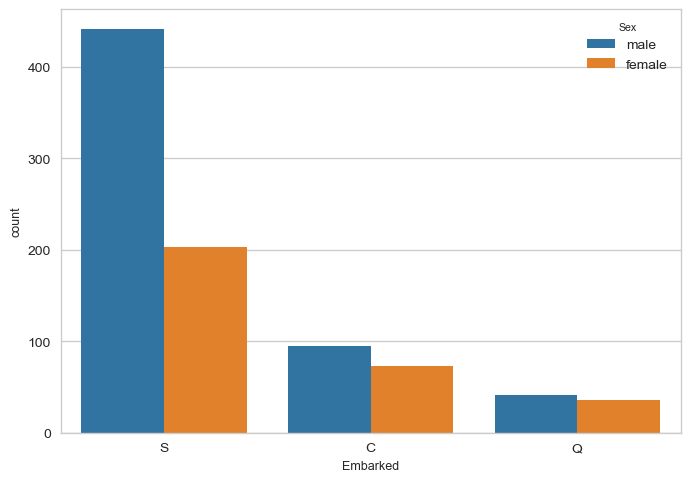

In [93]:
sns.countplot('Embarked', data=titanic, hue='Sex')

Text(0,0.5,'Survived')

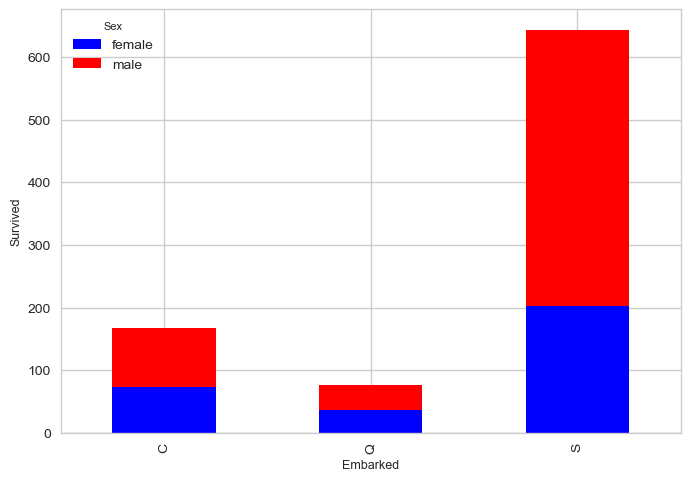

In [105]:
temp2 = pd.crosstab(titanic.Embarked, titanic.Sex)
temp2.plot(kind='bar',stacked=True, color=['blue', 'red']).set_ylabel('Survived')

Text(0,0.5,'Survived')

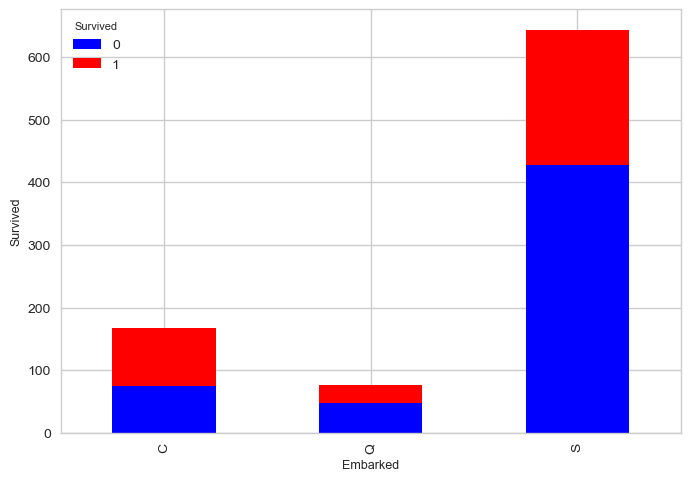

In [106]:
temp3 = pd.crosstab(titanic.Embarked, titanic.Survived)
temp3.plot(kind='bar', stacked=True, color=['blue', 'red']).set_ylabel('Survived')

#### SibSp (Sibling/Spouse)
Number of Siblings/Spouses Aboard

In [100]:
titanic.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

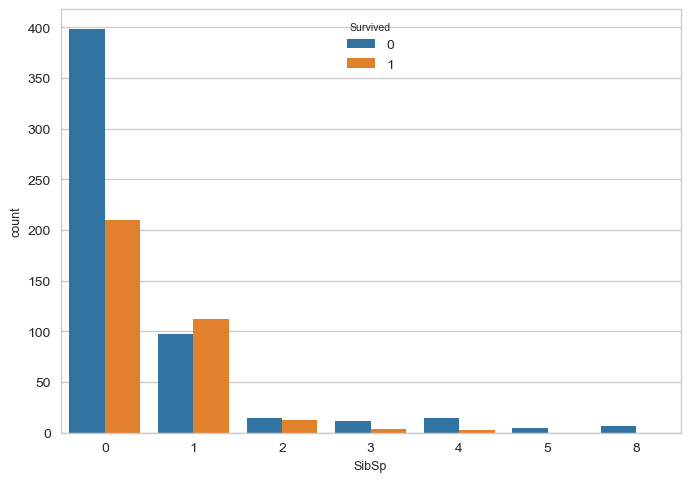

In [103]:
sns.countplot(x='SibSp', data=titanic, hue='Survived')

#### Parch (Passenger with Parents/children)
Number of Parents/Children Aboard

In [107]:
titanic.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

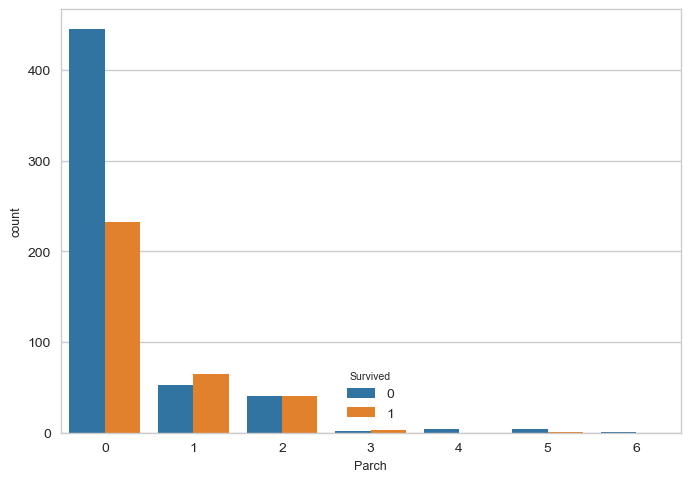

In [108]:
sns.countplot(x='Parch', data=titanic, hue='Survived')